# The Spark Foundation : Graduate Rotational internship program

# GRIP :  Data Science and Business Analytics intern 

# Name : Sanjay Rajput

# Task 1:- Prediction using supervised Machine Learning

# import libraries 

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

# The ' DataFrame '

In [2]:
url = (r"C:\Users\Sanjay Rajput\OneDrive\Documents\score_exam.xlsx")
score = pd.read_excel(url)

In [3]:
score.shape

(25, 2)

In [4]:
score.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# pandas functions

In [5]:
score.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
score.groupby("Hours").mean()

,Scores
Hours,
1.1,17.0
1.5,20.0
1.9,24.0
2.5,25.5
2.7,27.5
3.2,27.0
3.3,42.0
3.5,30.0
3.8,35.0


In [7]:
score.groupby("Scores").mean()

,Hours
Scores,
17,1.1
20,1.5
21,2.5
24,1.9
25,2.7
27,3.2
30,2.9
35,3.8
41,4.5


In [8]:
score.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


# plotting in pandas

<AxesSubplot:xlabel='count', ylabel='Hours'>

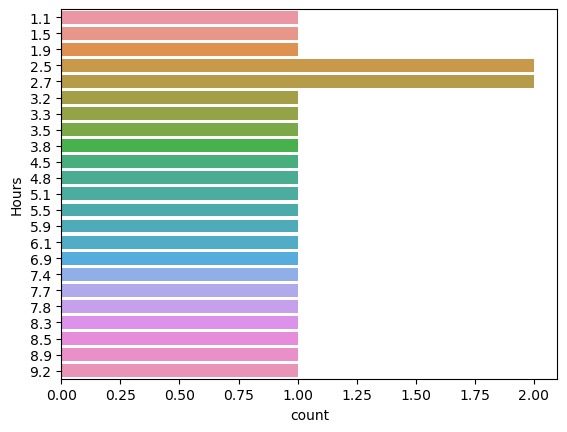

In [10]:
sns.countplot(y="Hours", data=score)

<AxesSubplot:xlabel='Hours'>

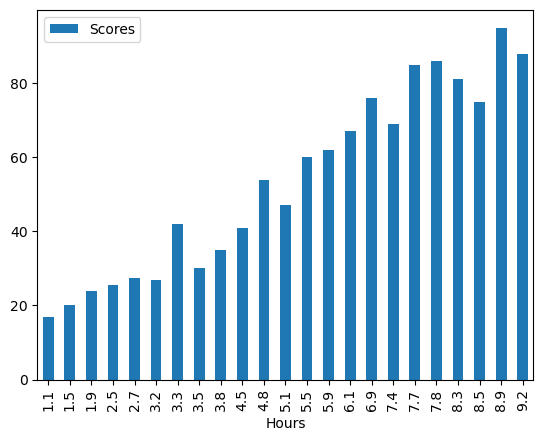

In [11]:
score.groupby("Hours").mean()[["Scores"]].plot(kind ="bar")

<AxesSubplot:ylabel='Frequency'>

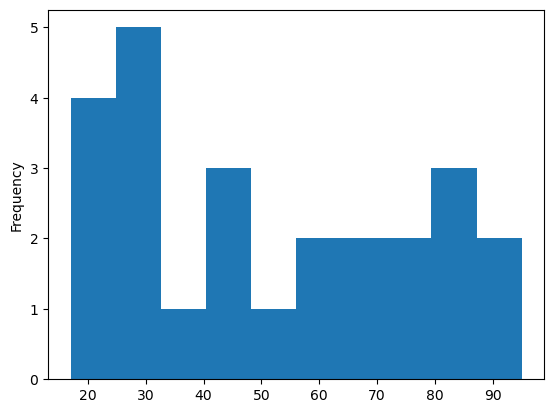

In [12]:
score["Scores"].plot(kind = "hist")

# Clusters

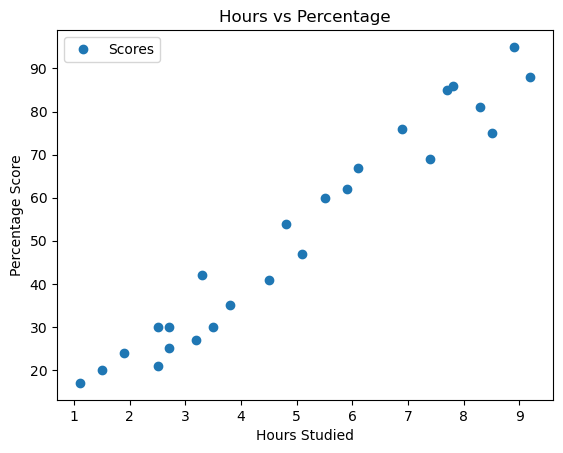

In [13]:
score.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Model Selection

In [14]:
X = score.iloc[:, :-1].values  
y = score.iloc[:, 1].values  

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [16]:
X_train.shape

(20, 1)

In [17]:
X_test.shape

(5, 1)

In [18]:
y_train.shape

(20,)

In [19]:
y_test.shape

(5,)

# LinearRegression 

In [20]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


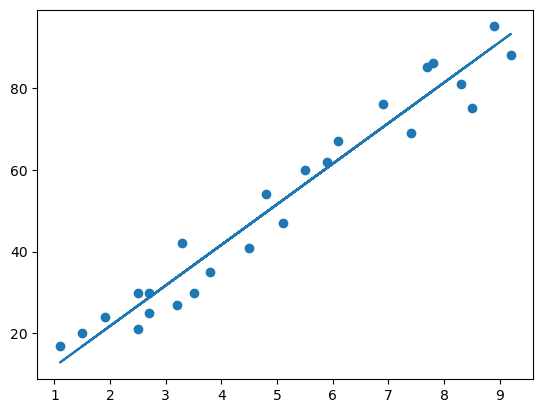

In [21]:

line = regressor.coef_*X+regressor.intercept_


plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [22]:
print(X_test) 
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [23]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
hr = np.array([8.10])
hours=hr.reshape(-1,1)
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[8.1]]
Predicted Score = 82.2944775346368


In [26]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


# accuracy in LinearRegression

In [27]:
print('Accuracy of LinearRegression regression on test set: {:.2f}'.format(regressor.score(X_test, y_test)))

Accuracy of LinearRegression regression on test set: 0.95


# THANK YOU